#### Forecast of the nosie spectrum of the cosmic birefringence reconstruction
#### - this code was used for forecasting CMB-HD white paper

In [1]:
# load modules
import numpy as np
from matplotlib.pyplot import *
import basic
import curvedsky
import plottools as pl

Define parameters

In [2]:
ilmax = 3000 # maximum multipole of input spectrum
olmax = 2048 # maximum multipole of reconstruction noise spectrum
rlmin = 500 # minimum multipole of CMB for reconstruction
rlmax = ilmax
# set multipole arrays
l = np.linspace(0,ilmax,ilmax+1)
L = np.linspace(0,olmax,olmax+1)

Load unlensed and lensed Cls

In [3]:
# load lensed Cls
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,ilmax,4,bb=True)/2.72e6**2

In [4]:
# set observed Cls
nl = np.zeros((4,ilmax+1))
nl[0,:] = (15.*np.pi/10800./2.72e6)**2 * np.exp(l*(l+1.)*(1.4*np.pi/10800.)**2/8./np.log(2.))
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl

In [5]:
+# compute the reconstruction noise spectrum
Al = {}
Al['TE'] = curvedsky.norm_quad.qte('rot',olmax,rlmin,rlmax,lcl[3,:rlmax+1],ocl[0,:rlmax+1],ocl[1,:rlmax+1])[0]
Al['TB'] = curvedsky.norm_quad.qtb('rot',olmax,rlmin,rlmax,lcl[3,:rlmax+1],ocl[0,:rlmax+1],ocl[2,:rlmax+1])[0]
Al['EE'] = curvedsky.norm_quad.qee('rot',olmax,rlmin,rlmax,lcl[1,:rlmax+1],ocl[1,:rlmax+1])[0]
Al['EB'] = curvedsky.norm_quad.qeb('rot',olmax,rlmin,rlmax,lcl[1,:rlmax+1],ocl[1,:rlmax+1],ocl[2,:rlmax+1])[0]
Al['BB'] = curvedsky.norm_quad.qbb('rot',olmax,rlmin,rlmax,lcl[2,:rlmax+1],ocl[2,:rlmax+1])[0]

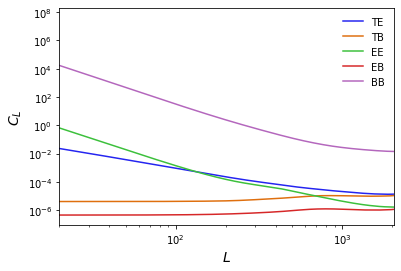

In [6]:
pl.plot_1dstyle(xlog=True,ylog=True)
for q in ['TE','TB','EE','EB','BB']:
    plot(Al[q],label=q)
legend(loc=0)